In [1]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [34]:
import scipy.integrate as integrate

In [122]:
import scipy.linalg as linalg

In [4]:
def exp(x):
    return np.exp(x)

def coscos(x):
    return np.cos(np.cos(x))

In [15]:
def periodic_maker(fun):
    def newfunc(x):
        return fun(np.remainder(x,2*np.pi))
    return newfunc

exp_periodic = periodic_maker(exp)
coscos_periodic = periodic_maker(coscos)

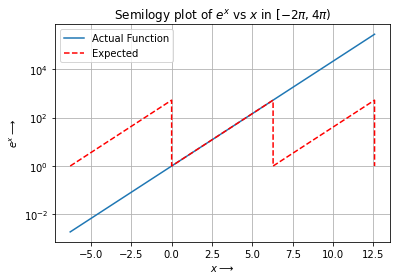

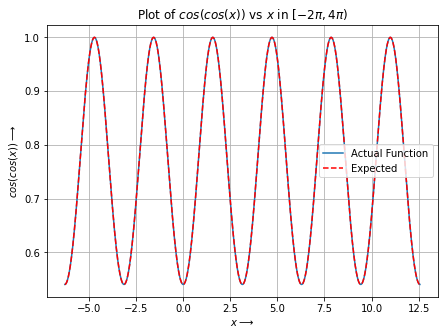

In [83]:
x = np.linspace(-2*np.pi, 4*np.pi, 10000)

fig, ax = plt.subplots(num=1)
ax.semilogy(x,exp(x),label ='Actual Function')
ax.semilogy(x,exp_periodic(x), 'r--', label='Expected')
plt.xlabel(r'$x \longrightarrow$')
plt.ylabel(r'$e^x \longrightarrow$')
plt.title(r'Semilogy plot of $e^x$ vs $x$ in $[-2\pi,4\pi)$')
plt.legend()
plt.grid()

fig, ax = plt.subplots(figsize=(7,5),num=2)
ax.plot(x, coscos(x), label ='Actual Function')
ax.plot(x, coscos_periodic(x), 'r--',label='Expected')
plt.xlabel(r'$x \longrightarrow$')
plt.ylabel(r'$cos(cos(x)) \longrightarrow$')
plt.title(r'Plot of $cos(cos(x))$ vs $x$ in $[-2\pi,4\pi)$')
plt.legend()
plt.grid()



In [75]:
def u(x,k,f):
    return f(x)*np.cos(k*x)

def v(x,k,f):
    return f(x)*np.sin(k*x)

In [185]:
def fourier(func, n):
    f_vec = np.zeros(n)
    
    f_vec[0] = integrate.quad(func, 0, 2*np.pi)[0]/(2*np.pi)
    
    for i in range(1,(n+1)//2):
        f_vec[2*i-1] = integrate.quad(u, 0, 2*np.pi, args=(i,func))[0]/np.pi
        f_vec[2*i] = integrate.quad(v, 0, 2*np.pi, args=(i,func))[0]/np.pi
    
    return f_vec

In [187]:
exp_fvec = fourier(exp, 51)
coscos_fvec = fourier(coscos, 51)

In [168]:
x = np.linspace(0,2*np.pi,401)
x = x[:-1]

def fourier_lstsq(func,x):
    b = func(x)
    A = np.zeros((400,51))
    A[:,0] =1
    for k in range(1,26):
        A[:,2*k-1] = np.cos(k*x)
        A[:,2*k] = np.sin(k*x)
    c = linalg.lstsq(A,b)[0]
    f_est = np.dot(A,c)
    return c, f_est


In [170]:
(exp_lstsq, exp_est) = fourier_lstsq(exp,x)
(coscos_lstsq, coscos_est) = fourier_lstsq(coscos,x)

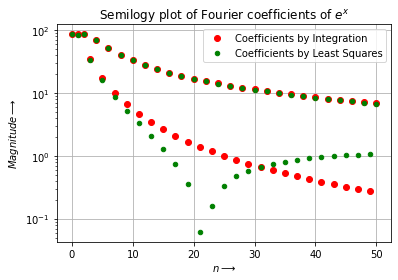

In [188]:
fig, ax = plt.subplots(num=3)
ax.semilogy(np.abs(exp_fvec),'ro', label = 'Coefficients by Integration')
ax.semilogy(np.abs(exp_lstsq),'go', label = 'Coefficients by Least Squares', markersize= 4.5)
plt.xlabel(r'$n \longrightarrow$')
plt.ylabel(r'$Magnitude \longrightarrow$')
plt.title(r'Semilogy plot of Fourier coefficients of $e^x$ ')
plt.legend()
plt.grid()

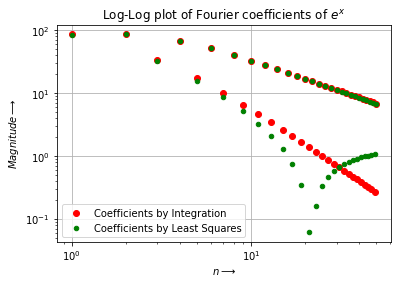

In [172]:
fig, ax = plt.subplots(num=4)
ax.loglog(np.abs(exp_fvec),'ro',label = 'Coefficients by Integration')
ax.loglog(np.abs(exp_lstsq),'go', label = 'Coefficients by Least Squares', markersize =4.5)
plt.xlabel(r'$n \longrightarrow$')
plt.ylabel(r'$Magnitude \longrightarrow$')
plt.title(r'Log-Log plot of Fourier coefficients of $e^x$ ')
plt.legend()
plt.grid()

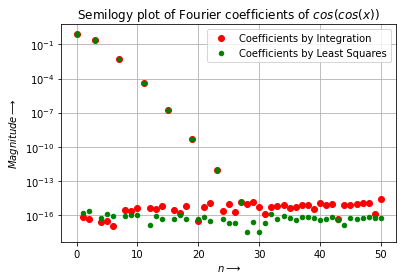

In [173]:
fig, ax = plt.subplots(num=5)
ax.semilogy(np.abs(coscos_fvec),'ro', label = 'Coefficients by Integration')
ax.semilogy(np.abs(coscos_lstsq), 'go', label = 'Coefficients by Least Squares', markersize =4.5)
plt.xlabel(r'$n \longrightarrow$')
plt.ylabel(r'$Magnitude \longrightarrow$')
plt.title(r'Semilogy plot of Fourier coefficients of $cos(cos(x))$')
plt.legend()
plt.grid()

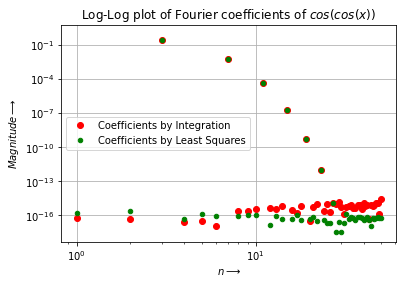

In [174]:
fig, ax = plt.subplots(num=6)
ax.loglog(np.abs(coscos_fvec),'ro', label ='Coefficients by Integration')
ax.loglog(np.abs(coscos_lstsq), 'go',  label = 'Coefficients by Least Squares', markersize =4.5)
plt.xlabel(r'$n \longrightarrow$')
plt.ylabel(r'$Magnitude \longrightarrow$')
plt.title(r'Log-Log plot of Fourier coefficients of $cos(cos(x))$ ')
plt.legend()
plt.grid()

In [175]:
print(np.amax(np.abs(exp_fvec - exp_lstsq)))
print(np.amax(np.abs(coscos_fvec - coscos_lstsq)))

1.3327308703353964
2.6566469738662125e-15


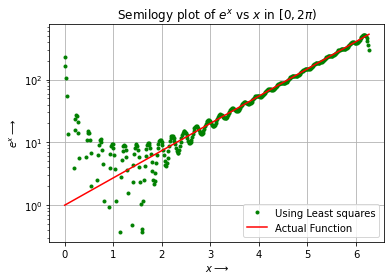

In [184]:
fig, ax = plt.subplots(num=7)
ax.semilogy(x,exp_est, 'go', label='Using Least squares', markersize =3)
ax.semilogy(x,exp(x),'r',label ='Actual Function')
plt.xlabel(r'$x \longrightarrow$')
plt.ylabel(r'$e^x \longrightarrow$')
plt.title(r'Semilogy plot of $e^x$ vs $x$ in $[0,2\pi)$')
plt.legend()
plt.grid()

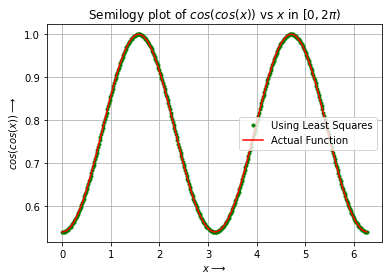

In [183]:
fig, ax = plt.subplots(num=8)
ax.plot(x,coscos_est, 'go', label='Using Least Squares',markersize = 3)
ax.plot(x,coscos(x),'r',label ='Actual Function')
plt.xlabel(r'$x \longrightarrow$')
plt.ylabel(r'$cos(cos(x)) \longrightarrow$')
plt.title(r'Semilogy plot of $cos(cos(x))$ vs $x$ in $[0,2\pi)$')
plt.legend()
plt.grid()